# Boston Crime - Charlie Rousmaniere
---



# Import Data

This section handles all library imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from ydata_profiling import ProfileReport

In [2]:
directory_name = 'data/'
crime_data = pd.DataFrame()

This cell itterates through the data folder. It ingests, and appends each csv file to the crime_data dataframe. It parses the OCCURED_ON_DATE column in each file as a date, not a string.

In [3]:
for file in os.listdir(directory_name):
    file_path = os.path.join(directory_name, file)
    df = pd.read_csv(file_path, index_col='INCIDENT_NUMBER', parse_dates=['OCCURRED_ON_DATE'])
    crime_data = pd.concat([crime_data, df])

/tmp/ipykernel_1937/53376772.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, index_col='INCIDENT_NUMBER', parse_dates=['OCCURRED_ON_DATE'])
/tmp/ipykernel_1937/53376772.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, index_col='INCIDENT_NUMBER', parse_dates=['OCCURRED_ON_DATE'])
/tmp/ipykernel_1937/53376772.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, index_col='INCIDENT_NUMBER', parse_dates=['OCCURRED_ON_DATE'])
/tmp/ipykernel_1937/53376772.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, index_col='INCIDENT_NUMBER', parse_dates=['OCCURRED_ON_DATE'])


The crime_data dataframe now holds all of the crime data in boston between 2016 and 2022.

---


# Data Profiling

In [4]:
profile = ProfileReport(crime_data, title='Boston Crime Profiling Report')

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Through the profiling overview I was able to determine a few issues with the data. There are roughly 2000 duplicate rows which will need to be handles. The shooting column has a massive amount of missing data. It also contains data type mixing with some positive values entered as 1 and some as 'Y'. I also dont like that all of the column headers are all caps so I'm going to change that.

---

# Data Cleaning

This cell gives an overview of the data before I've cleaned it.

In [5]:
crime_data

OFFENSE_CODE  OFFENSE_CODE_GROUP  \
INCIDENT_NUMBER                                     
I192014489               1107               Fraud   
I182010615               2629          Harassment   
I182008540               1201        Embezzlement   
I192039161                423  Aggravated Assault   
I182055060               2629          Harassment   
...                       ...                 ...   
222000167                3201                 NaN   
212095526                3111                 NaN   
212095530                3114                 NaN   
222000197                3202                 NaN   
222000001                3115                 NaN   

                          OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  \
INCIDENT_NUMBER                                                         
I192014489              FRAUD - IMPERSONATION      C11            352   
I182010615                         HARASSMENT       D4            161   
I182008540                       EMBEZZLEMENT       A1            122   
I192039161               ASSAULT - AGGRAVATED       B2            330   
I182055060                         HARASSMENT       E5            562   
...                                       ...      ...            ...   
222000167            PROPERTY - LOST/ MISSING       A1             77   
212095526           LICENSE PREMISE VIOLATION       C6                  
212095530                INVESTIGATE PROPERTY       B2                  
222000197        PROPERTY - LOST THEN LOCATED       B3            409   
222000001                  INVESTIGATE PERSON       A1                  

                SHOOTING    OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
INCIDENT_NUMBER                                                               
I192014489           NaN 2016-01-01 00:00:00  2016      1      Friday     0   
I182010615           NaN 2016-01-01 00:00:00  2016      1      Friday     0   
I182008540           NaN 2016-01-01 00:00:00  2016      1      Friday     0   
I192039161           NaN 2016-01-01 00:00:00  2016      1      Friday     0   
I182055060           NaN 2016-01-01 00:00:00  2016      1      Friday     0   
...                  ...                 ...   ...    ...         ...   ...   
222000167              0 2021-12-31 23:00:00  2021     12      Friday    23   
212095526              0 2021-12-31 23:15:00  2021     12      Friday    23   
212095530              0 2021-12-31 23:21:00  2021     12      Friday    23   
222000197              0 2021-12-31 23:30:00  2021     12      Friday    23   
222000001              0 2021-12-31 23:39:00  2021     12      Friday    23   

                 UCR_PART          STREET        Lat       Long  \
INCIDENT_NUMBER                                                   
I192014489       Part Two       DITSON ST  42.301085 -71.063908   
I182010615       Part Two      TREMONT ST  42.347017 -71.068862   
I182008540       Part Two   WASHINGTON ST  42.350005 -71.063591   
I192039161       Part One     COLUMBIA RD  42.305248 -71.080894   
I182055060       Part Two   WASHINGTON ST  42.287889 -71.126586   
...                   ...             ...        ...        ...   
222000167             NaN  NEW SUDBURY ST  42.361839 -71.059765   
212095526             NaN    SEAPORT BLVD  42.352756 -71.047481   
212095530             NaN    HUMBOLDT AVE  42.314303 -71.088566   
222000197             NaN       MENTON ST  42.272983 -71.078050   
222000001             NaN      TREMONT ST  42.349429 -71.065366   

                                                 Location  
INCIDENT_NUMBER                                            
I192014489                    (42.30108481, -71.06390782)  
I182010615                    (42.34701666, -71.06886238)  
I182008540                    (42.35000492, -71.06359053)  
I192039161                    (42.30524752, -71.08089418)  
I182055060                    (42.28788933, -71.12658585)  
...                                                   ...

## Renaming Column Headers

I dont like that all of the column headers are in All-Caps. I'm going to make them lowercase.

[Stack Overflow](https://stackoverflow.com/questions/19726029/how-can-i-make-pandas-dataframe-column-headers-all-lowercase)

In [6]:
crime_data.columns = map(str.lower, crime_data.columns)

crime_data.head()

offense_code  offense_code_group    offense_description  \
INCIDENT_NUMBER                                                            
I192014489               1107               Fraud  FRAUD - IMPERSONATION   
I182010615               2629          Harassment             HARASSMENT   
I182008540               1201        Embezzlement           EMBEZZLEMENT   
I192039161                423  Aggravated Assault   ASSAULT - AGGRAVATED   
I182055060               2629          Harassment             HARASSMENT   

                district reporting_area shooting occurred_on_date  year  \
INCIDENT_NUMBER                                                           
I192014489           C11            352      NaN       2016-01-01  2016   
I182010615            D4            161      NaN       2016-01-01  2016   
I182008540            A1            122      NaN       2016-01-01  2016   
I192039161            B2            330      NaN       2016-01-01  2016   
I182055060            E5            562      NaN       2016-01-01  2016   

                 month day_of_week  hour  ucr_part         street        lat  \
INCIDENT_NUMBER                                                                
I192014489           1      Friday     0  Part Two      DITSON ST  42.301085   
I182010615           1      Friday     0  Part Two     TREMONT ST  42.347017   
I182008540           1      Friday     0  Part Two  WASHINGTON ST  42.350005   
I192039161           1      Friday     0  Part One    COLUMBIA RD  42.305248   
I182055060           1      Friday     0  Part Two  WASHINGTON ST  42.287889   

                      long                     location  
INCIDENT_NUMBER                                          
I192014489      -71.063908  (42.30108481, -71.06390782)  
I182010615      -71.068862  (42.34701666, -71.06886238)  
I182008540      -71.063591  (42.35000492, -71.06359053)  
I192039161      -71.080894  (42.30524752, -71.08089418)  
I182055060      -71.126586  (42.28788933, -71.12658585)

All of the column headers are now lowercase.

## Shooting Column Missing Data

The missing shooting data needs to be replaced with 0s. 

In [7]:
crime_data.shooting = crime_data.shooting.fillna(0)
crime_data.shooting.value_counts()

shooting
0    598529
1      3574
Y      1204
Name: count, dtype: int64

There is also missmatched data, the Y's need to be replaced with 1's.

In [8]:
crime_data.shooting = [1 if i == 'Y' else i for i in crime_data.shooting]

crime_data.shooting.value_counts()

shooting
0    598529
1      4778
Name: count, dtype: int64

The shooting column now only consists of 1's and 0s.

## Duplicate Rows

The data set has thousands of duplicate rows so they need to be investigated and possibly dropped.

In [9]:
duplicates = crime_data[crime_data.duplicated()]

len(duplicates)

2127

There are 2127 duplicate rows, this is more than what the profile pointed out. I think that's because the profiling does not count the first occurence of each duplicate row.

In [10]:
duplicates.head()

offense_code    offense_code_group   offense_description  \
INCIDENT_NUMBER                                                             
I162000087               2401    Disorderly Conduct                AFFRAY   
I162000454               3114  Investigate Property  INVESTIGATE PROPERTY   
I162000204               1402             Vandalism             VANDALISM   
I162000207               1402             Vandalism             VANDALISM   
I162000206               1402             Vandalism             VANDALISM   

                district reporting_area  shooting    occurred_on_date  year  \
INCIDENT_NUMBER                                                               
I162000087            B3            426         0 2016-01-01 03:34:00  2016   
I162000454            C6                        0 2016-01-01 10:00:00  2016   
I162000204           C11            257         0 2016-01-01 14:10:00  2016   
I162000207           C11            257         0 2016-01-01 14:10:00  2016   
I162000206           C11            257         0 2016-01-01 14:10:00  2016   

                 month day_of_week  hour    ucr_part         street  \
INCIDENT_NUMBER                                                       
I162000087           1      Friday     3    Part Two       RIVER ST   
I162000454           1      Friday    10  Part Three  JAMES O'NEILL   
I162000204           1      Friday    14    Part Two    EVERETT AVE   
I162000207           1      Friday    14    Part Two    EVERETT AVE   
I162000206           1      Friday    14    Part Two    EVERETT AVE   

                       lat       long                     location  
INCIDENT_NUMBER                                                     
I162000087       42.268024 -71.093011  (42.26802400, -71.09301057)  
I162000454             NaN        NaN                          NaN  
I162000204       42.315267 -71.063069  (42.31526714, -71.06306870)  
I162000207       42.315267 -71.063069  (42.31526714, -71.06306870)  
I162000206       42.315267 -71.063069  (42.31526714, -71.06306870)

This cell drops all duplicate rows, keeping the first instance of each row.

In [11]:
crime_data.drop_duplicates(keep='first', inplace=True)

In [12]:
crime_data.duplicated().value_counts()

False    601180
Name: count, dtype: int64

All duplicate rows are now dropped.

---

# Basic Questions

## Date Range

What range of dates does the dataset cover?

This cell finds the first data and the last date to determine the range of dates.

In [13]:
start = crime_data.occurred_on_date.min()
end = crime_data.occurred_on_date.max()

print(f'Data ranges from {start} to {end}')

Data ranges from 2016-01-01 00:00:00 to 2022-12-31 23:50:00


The data set begins on January 1st 2016 and ends on December 31st 2022 at 11:50 PM

## Offence Codes

What are the unique groups of offense codes, and what are the 20 most prevalent?

This cell prints all of the unique offense codes.

In [14]:
crime_data.offense_code_group.unique()

array(['Fraud', 'Harassment', 'Embezzlement', 'Aggravated Assault',
       'Property Lost', 'Larceny', 'Other', 'Investigate Person',
       'Motor Vehicle Accident Response', 'Residential Burglary',
       'Confidence Games', 'Simple Assault', 'Liquor Violation',
       'License Violation', 'Investigate Property',
       'Larceny From Motor Vehicle', 'Medical Assistance', 'Vandalism',
       'Disorderly Conduct', 'Arson', 'Operating Under the Influence',
       'Verbal Disputes', 'Property Found', 'Auto Theft',
       'Missing Person Located', 'Missing Person Reported', 'Robbery',
       'Drug Violation', 'Towed', 'Fire Related Reports',
       'Police Service Incidents', 'Landlord/Tenant Disputes',
       'Warrant Arrests', 'Prisoner Related Incidents', 'Violations',
       'Restraining Order Violations', 'Firearm Violations',
       'Recovered Stolen Property', 'Commercial Burglary', 'Evading Fare',
       'Property Related Damage', 'Assembly or Gathering Violations',
       'Firear

How many unique offense codes are there?

In [15]:
crime_data.offense_code_group.nunique()

67

There are 67 unique offense codes reported in Boston.

What are the 20 most frequently reported codes?

In [16]:
num_codes = 20

frequency = crime_data.offense_code_group.value_counts()

frequency.index[:num_codes]

Index(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other', 'Simple Assault', 'Drug Violation',
       'Vandalism', 'Verbal Disputes', 'Investigate Property', 'Towed',
       'Larceny From Motor Vehicle', 'Property Lost', 'Warrant Arrests',
       'Aggravated Assault', 'Fraud', 'Violations', 'Missing Person Located',
       'Residential Burglary', 'Auto Theft'],
      dtype='object', name='offense_code_group')

This cell shows the 20 most frequent offense codes. The most common offense code is "Motor Vehicle Accident Response."

---

# Questions With Visuals

## Shooting Murders

What percentage of murders in boston are shootings?

First we must extract all of the crime reports which are murders. This cell creates a dataframe of all of the crime reports which were murders.

In [17]:
murders = crime_data[crime_data.offense_code == 111]

murders.head()

offense_code offense_code_group  \
INCIDENT_NUMBER                                    
I162002573                111           Homicide   
I162003560                111           Homicide   
I162007065                111           Homicide   
I162008434                111           Homicide   
I162009550                111           Homicide   

                                 offense_description district reporting_area  \
INCIDENT_NUMBER                                                                
I162002573       MURDER, NON-NEGLIGIENT MANSLAUGHTER       A7             16   
I162003560       MURDER, NON-NEGLIGIENT MANSLAUGHTER       B2            593   
I162007065       MURDER, NON-NEGLIGIENT MANSLAUGHTER      C11            400   
I162008434       MURDER, NON-NEGLIGIENT MANSLAUGHTER       B2            294   
I162009550       MURDER, NON-NEGLIGIENT MANSLAUGHTER       B2            318   

                 shooting    occurred_on_date  year  month day_of_week  hour  \
INCIDENT_NUMBER                                                                
I162002573              1 2016-01-10 01:36:00  2016      1      Sunday     1   
I162003560              1 2016-01-13 19:36:00  2016      1   Wednesday    19   
I162007065              1 2016-01-27 01:39:00  2016      1   Wednesday     1   
I162008434              0 2016-01-31 00:00:00  2016      1      Sunday     0   
I162009550              1 2016-02-04 17:46:00  2016      2    Thursday    17   

                 ucr_part         street        lat       long  \
INCIDENT_NUMBER                                                  
I162002573       Part One      FALCON ST  42.381962 -71.031845   
I162003560       Part One     FENWOOD RD  42.335117 -71.107677   
I162007065       Part One  WASHINGTON ST  42.285811 -71.071155   
I162008434       Part One      ALPINE ST  42.325452 -71.086780   
I162009550       Part One  BROOKLEDGE ST  42.309563 -71.089902   

                                    location  
INCIDENT_NUMBER                               
I162002573       (42.38196242, -71.03184460)  
I162003560       (42.33511654, -71.10767674)  
I162007065       (42.28581121, -71.07115483)  
I162008434       (42.32545165, -71.08677983)  
I162009550       (42.30956305, -71.08990197)

Then we must determine, of those murders, how many are shootings. This cell creates two new dataframes: one of all shooting murders, and one of all non-shooting murders.

In [18]:
shootings = murders[murders.shooting == 1]
non_shooting = murders[murders.shooting == 0]

shootings.head()

offense_code offense_code_group  \
INCIDENT_NUMBER                                    
I162002573                111           Homicide   
I162003560                111           Homicide   
I162007065                111           Homicide   
I162009550                111           Homicide   
I162022418                111           Homicide   

                                 offense_description district reporting_area  \
INCIDENT_NUMBER                                                                
I162002573       MURDER, NON-NEGLIGIENT MANSLAUGHTER       A7             16   
I162003560       MURDER, NON-NEGLIGIENT MANSLAUGHTER       B2            593   
I162007065       MURDER, NON-NEGLIGIENT MANSLAUGHTER      C11            400   
I162009550       MURDER, NON-NEGLIGIENT MANSLAUGHTER       B2            318   
I162022418       MURDER, NON-NEGLIGIENT MANSLAUGHTER       A7             14   

                 shooting    occurred_on_date  year  month day_of_week  hour  \
INCIDENT_NUMBER                                                                
I162002573              1 2016-01-10 01:36:00  2016      1      Sunday     1   
I162003560              1 2016-01-13 19:36:00  2016      1   Wednesday    19   
I162007065              1 2016-01-27 01:39:00  2016      1   Wednesday     1   
I162009550              1 2016-02-04 17:46:00  2016      2    Thursday    17   
I162022418              1 2016-03-22 22:29:00  2016      3     Tuesday    22   

                 ucr_part         street        lat       long  \
INCIDENT_NUMBER                                                  
I162002573       Part One      FALCON ST  42.381962 -71.031845   
I162003560       Part One     FENWOOD RD  42.335117 -71.107677   
I162007065       Part One  WASHINGTON ST  42.285811 -71.071155   
I162009550       Part One  BROOKLEDGE ST  42.309563 -71.089902   
I162022418       Part One  WORDSWORTH ST  42.384922 -71.017464   

                                    location  
INCIDENT_NUMBER                               
I162002573       (42.38196242, -71.03184460)  
I162003560       (42.33511654, -71.10767674)  
I162007065       (42.28581121, -71.07115483)  
I162009550       (42.30956305, -71.08990197)  
I162022418       (42.38492212, -71.01746350)

So what percentage of murders in Boston are shooting?

This cell creates a pie chart to vizualize the data.

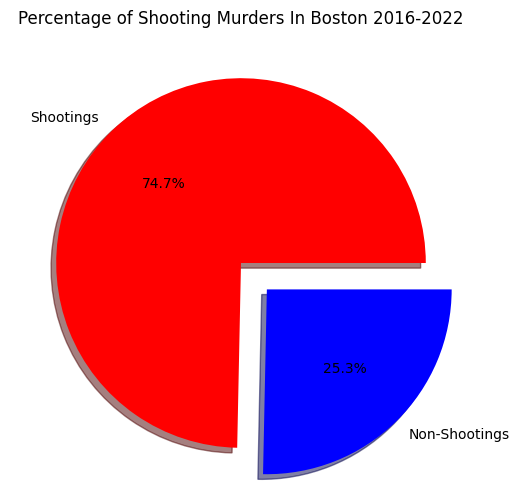

In [19]:
labels = ['Shootings', 'Non-Shootings']
sizes = np.array([shootings.size, non_shooting.size])
explode = [0, 0.2]
colors = ['red', 'blue']

plt.figure(figsize=(6, 6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, colors=colors)
plt.title('Percentage of Shooting Murders In Boston 2016-2022')
plt.show()

Roughly 75% of all murders commited in Boston from 2016 - 2022 were shootings.

How many murders were there, and how many were shootings? This next cell uses a bar chart to show the quantitave data behind these percentages.

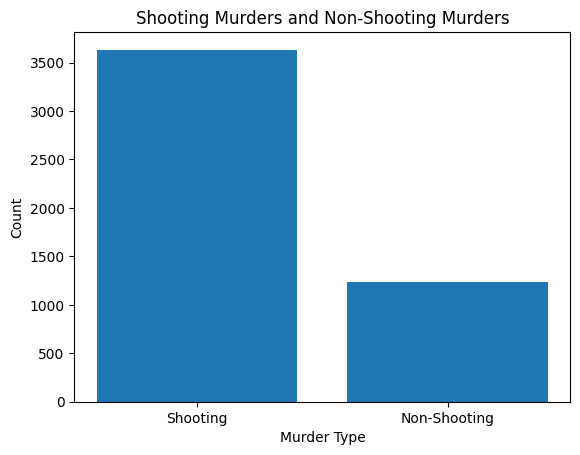

In [20]:
x = np.array(['Shooting', 'Non-Shooting'])
y = np.array([shootings.size, non_shooting.size])

plt.bar(x,y)
plt.title('Shooting Murders and Non-Shooting Murders')
plt.xlabel('Murder Type')
plt.ylabel('Count')
plt.show()

There have been a little over 3,500 shooting murders committed in Boston from 2016 - 2022, and a little under 1,500 shooting murders.

## Crimes By Time of Year

Is there a time of year where crimes are more prevalent?

First the date of each crime needs to be isolated. This cell creates a new 'date' column in the crime_data dataframe.

In [21]:
crime_data['date'] = crime_data.occurred_on_date.dt.date
crime_data.head()

offense_code  offense_code_group    offense_description  \
INCIDENT_NUMBER                                                            
I192014489               1107               Fraud  FRAUD - IMPERSONATION   
I182010615               2629          Harassment             HARASSMENT   
I182008540               1201        Embezzlement           EMBEZZLEMENT   
I192039161                423  Aggravated Assault   ASSAULT - AGGRAVATED   
I182055060               2629          Harassment             HARASSMENT   

                district reporting_area  shooting occurred_on_date  year  \
INCIDENT_NUMBER                                                            
I192014489           C11            352         0       2016-01-01  2016   
I182010615            D4            161         0       2016-01-01  2016   
I182008540            A1            122         0       2016-01-01  2016   
I192039161            B2            330         0       2016-01-01  2016   
I182055060            E5            562         0       2016-01-01  2016   

                 month day_of_week  hour  ucr_part         street        lat  \
INCIDENT_NUMBER                                                                
I192014489           1      Friday     0  Part Two      DITSON ST  42.301085   
I182010615           1      Friday     0  Part Two     TREMONT ST  42.347017   
I182008540           1      Friday     0  Part Two  WASHINGTON ST  42.350005   
I192039161           1      Friday     0  Part One    COLUMBIA RD  42.305248   
I182055060           1      Friday     0  Part Two  WASHINGTON ST  42.287889   

                      long                     location        date  
INCIDENT_NUMBER                                                      
I192014489      -71.063908  (42.30108481, -71.06390782)  2016-01-01  
I182010615      -71.068862  (42.34701666, -71.06886238)  2016-01-01  
I182008540      -71.063591  (42.35000492, -71.06359053)  2016-01-01  
I192039161      -71.080894  (42.30524752, -71.08089418)  2016-01-01  
I182055060      -71.126586  (42.28788933, -71.12658585)  2016-01-01

I'm going to analyze time of year in two ways. First, by seperating the data into years, and looking at crime by month. Second, by looking at total crime by month across all 6 years.

In [22]:
crimes_by_year = crime_data.groupby(['month','year']).size()
crimes_by_month = crime_data.groupby('month').size()

This cell creates two plots. One is a multi-line chart which shows crime each month by year. The other shows the total crimes by month from 2016 - 2022.

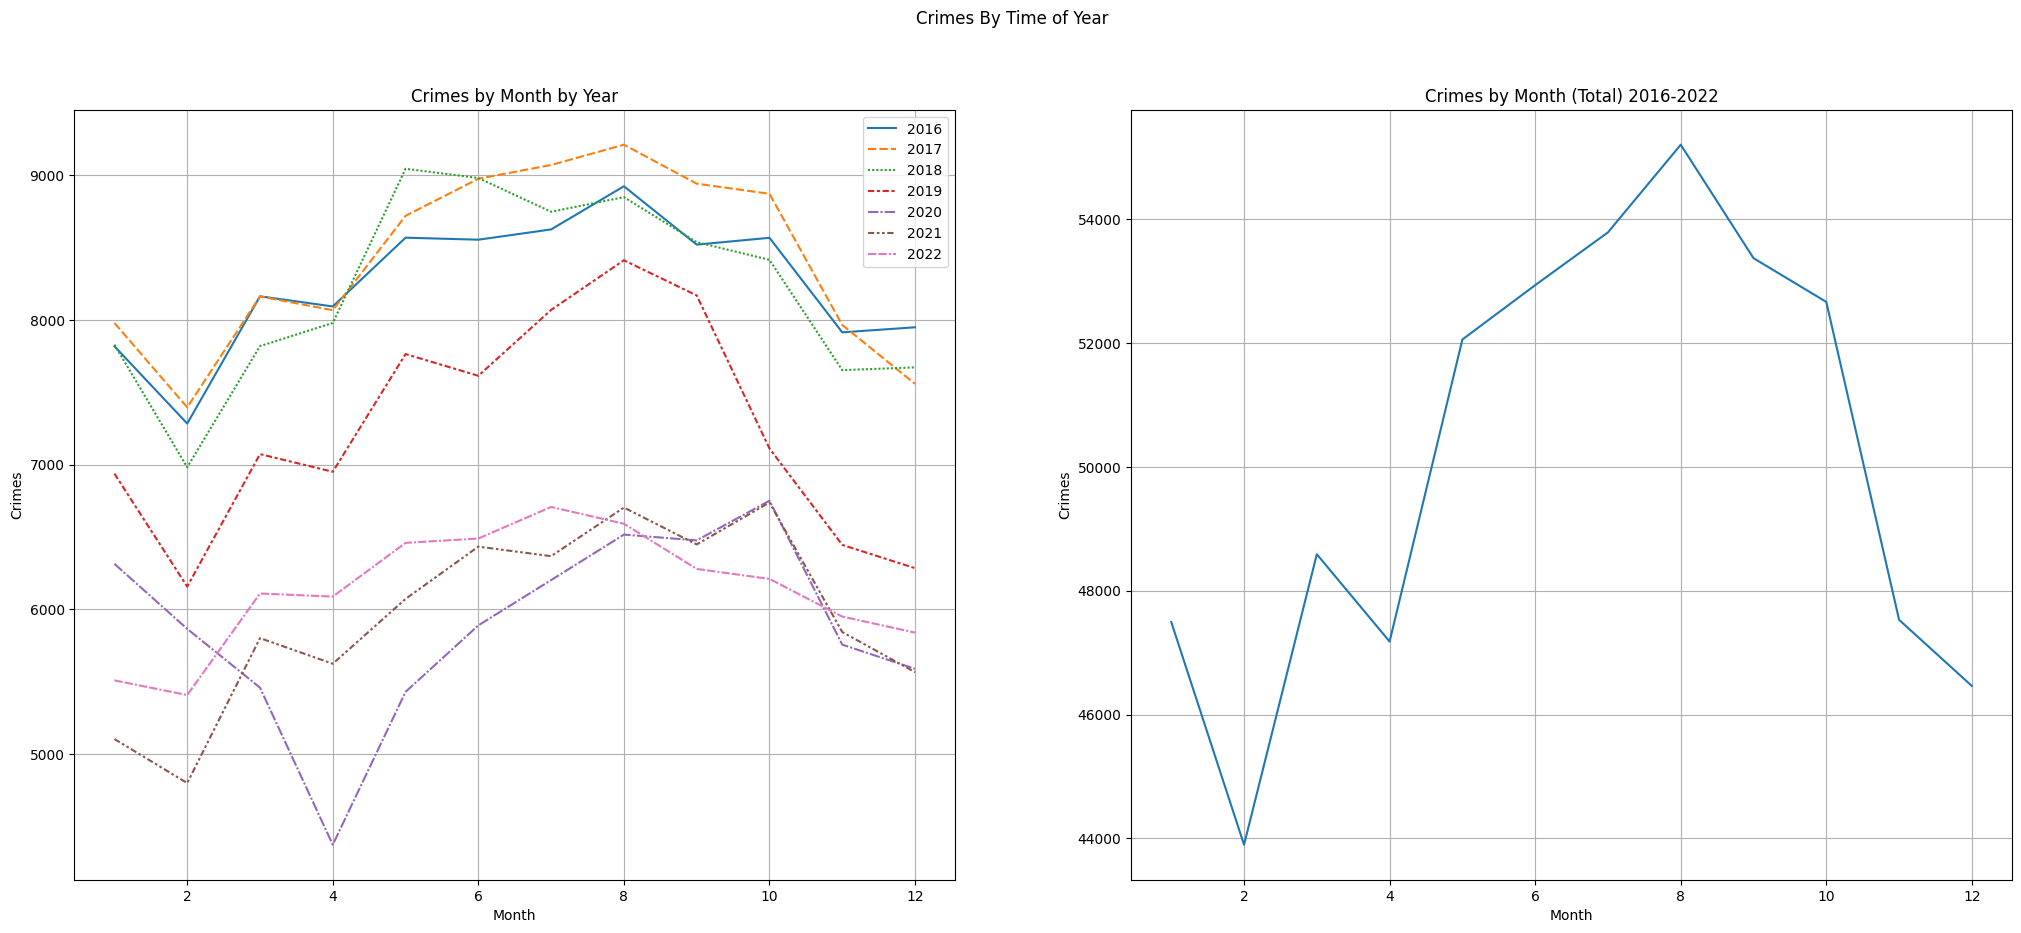

In [23]:
plt.subplots(1,2, figsize=(25,10))
plt.subplot(1,2,1,)

sns.lineplot(crimes_by_year.unstack())
plt.title('Crimes by Month by Year')
plt.grid()
plt.ylabel('Crimes')
plt.xlabel('Month')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.lineplot(crimes_by_month)
plt.title('Crimes by Month (Total) 2016-2022')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Crimes')

plt.suptitle('Crimes By Time of Year')
plt.show()

These Graphs show that more crimes are committed in the fall months in Boston--especially in August. They right graph also shows that crime rates have been significantly lower over the last 3 years.

---

## Crimes By Time of Day

Are there certain times in Boston when crime is more prevalent?

First, I'm going to analyze number of crimes by hour of the day.

In [24]:
crime_by_hour = crime_data.groupby('hour').size()
crime_by_year_hour = crime_data.groupby(['hour', 'year']).size()

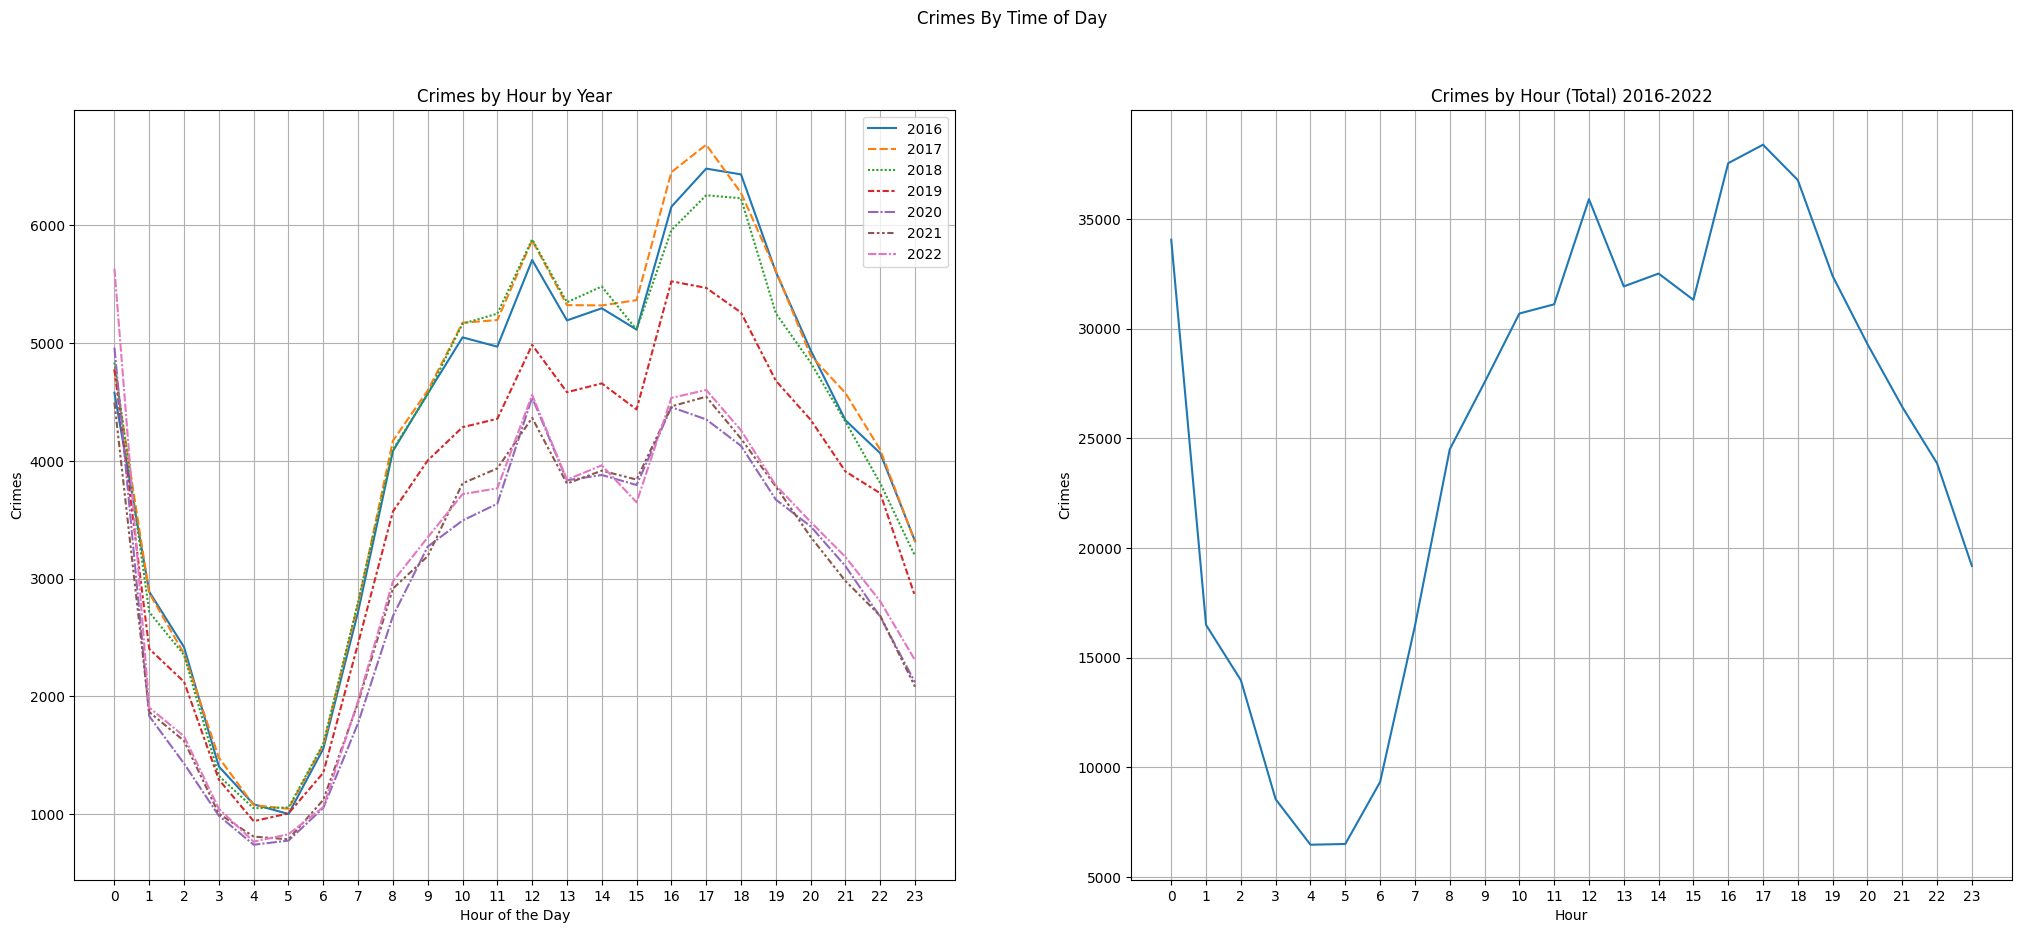

In [25]:
plt.subplots(1,2, figsize=(25,10))
plt.subplot(1,2,1,)

sns.lineplot(crime_by_year_hour.unstack())
plt.title('Crimes by Hour by Year')
plt.grid()
plt.ylabel('Crimes')
plt.xlabel('Hour of the Day')
plt.legend(loc='upper right')
plt.xticks(range(24))

plt.subplot(1,2,2)
sns.lineplot(crime_by_hour)
plt.title('Crimes by Hour (Total) 2016-2022')
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Crimes')
plt.xticks(range(24))

plt.suptitle('Crimes By Time of Day')
plt.show()

Very Few crimes are commited between 1AM and 7AM. The most frequent time for crimes to be committed is between 3PM and 7PM. There is also a spike in crimes at 12PM and 12AM.  

When is the most common time for murders to be committed?

In [31]:
murders = crime_data[crime_data.offense_code == 111]

murders_by_hour = murders.groupby('hour').size()
murders_by_year_hour = murders.groupby(['hour', 'year']).size()

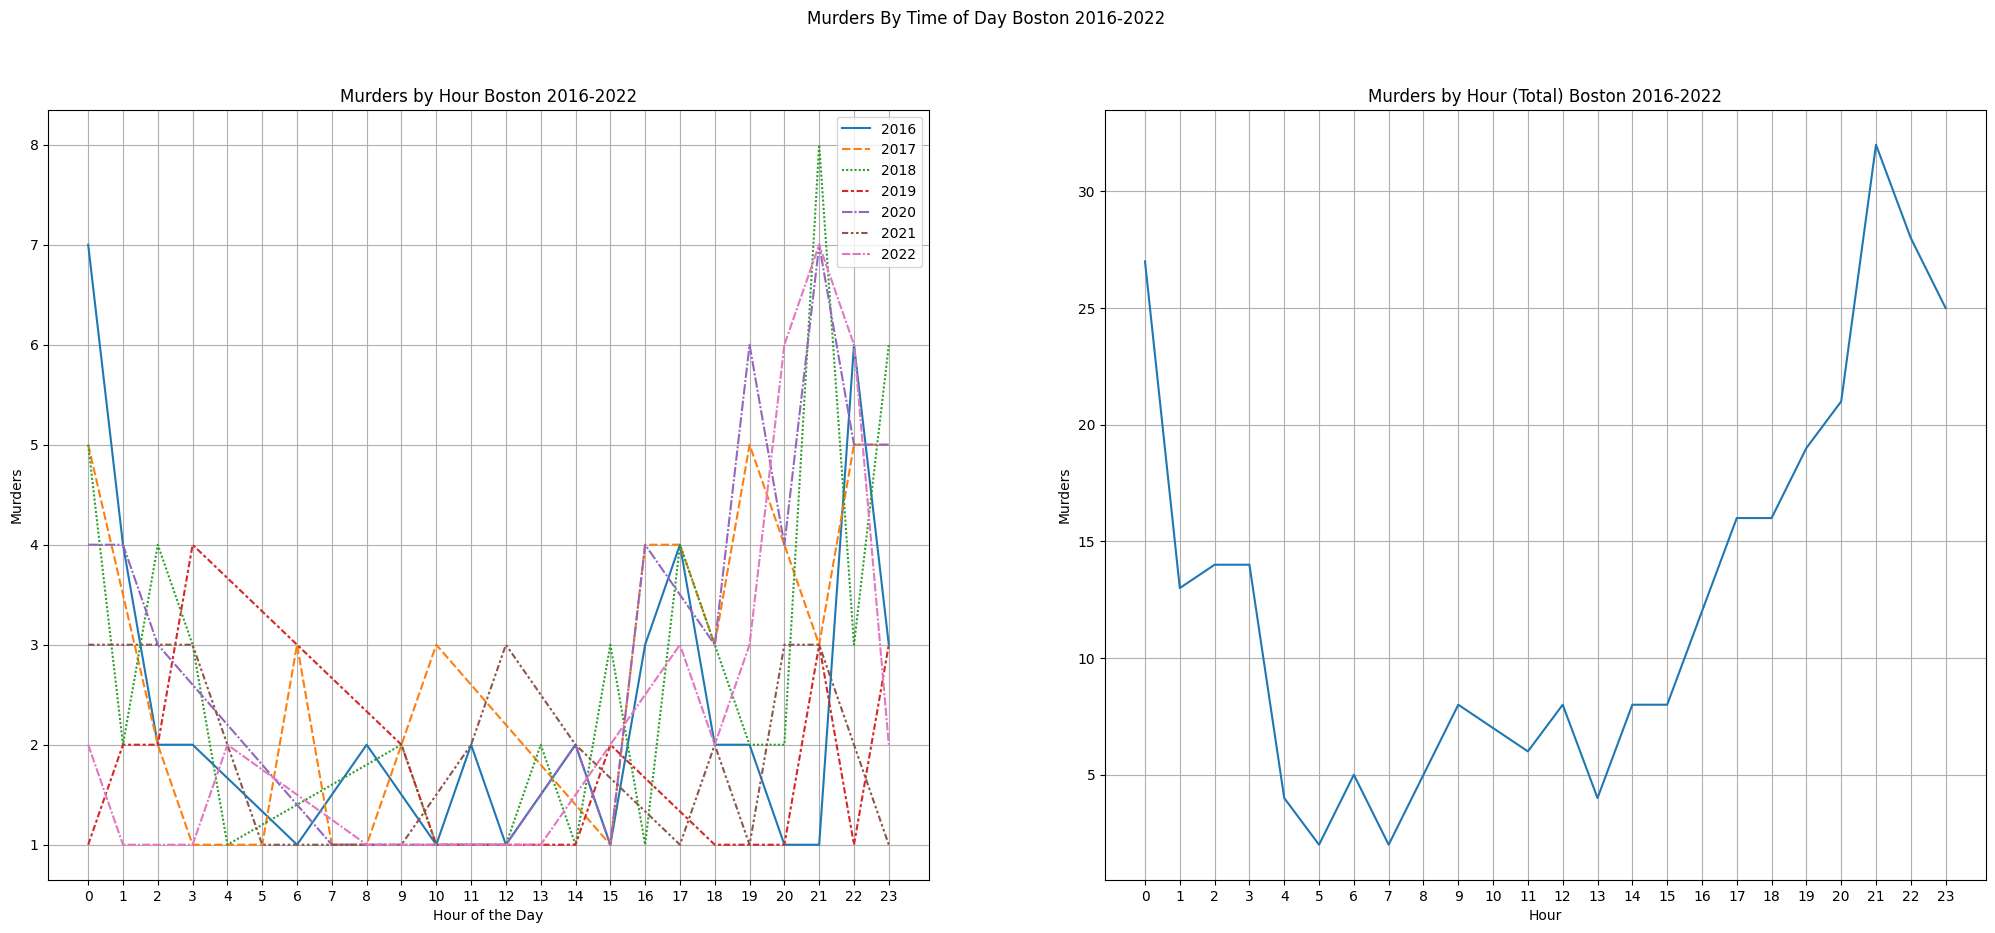

In [32]:
plt.subplots(1,2, figsize=(25,10))
plt.subplot(1,2,1,)

sns.lineplot(murders_by_year_hour.unstack())
plt.title('Murders by Hour Boston 2016-2022')
plt.grid()
plt.ylabel('Murders')
plt.xlabel('Hour of the Day')
plt.legend(loc='upper right')
plt.xticks(range(24))

plt.subplot(1,2,2)
sns.lineplot(murders_by_hour)
plt.title('Murders by Hour (Total) Boston 2016-2022')
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Murders')
plt.xticks(range(24))

plt.suptitle('Murders By Time of Day Boston 2016-2022')
plt.show()

The chart on the left is hard to interperet, however, the chart on the right shows that murders are much more common in the late hours of the night and early hours of the morning.

## Crime type by time of day

In [33]:
sns.heatmap(crime_data['o'])

KeyError: ('offense_code_group', 'hour')